# Gravity field for the whole World

## Importing libraries

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import ipywidgets as widgets

In [2]:
notebook_name = 'gravity_earth.ipynb'

### Plot style

In [3]:
plt.style.use('ggplot')

#### Open a dictionary

In [4]:
data_set = dict()

#### Saving files

In [5]:
saved_files = []

### Loading data

In [6]:
filename = 'data_set/gravity_earth_EIGEN-6C4_ICGEM.gdf'

In [7]:
names = ['LONG','LAT','GRAV_DATA']

In [8]:
data = pd.read_csv(filename,usecols=(0,1,3),names=names, skipinitialspace=True, skiprows=34,
                   delim_whitespace=True,low_memory=False)

In [9]:
N_long = 181
N_lat = 361
data_set['shape'] = (N_long,N_lat)

In [10]:
data_set['long'] = data.iloc[:,0].to_numpy()
data_set['lat'] = data.iloc[:,1].to_numpy()
data_set['grav_field'] = data.iloc[:,2].to_numpy()

data_set['grav_earth'] = data_set['grav_field'].reshape(data_set['shape'])
data_set['LONG'] = data_set['long'].reshape(data_set['shape'])
data_set['LAT'] = data_set['lat'].reshape(data_set['shape'])

## Gravity field (World)

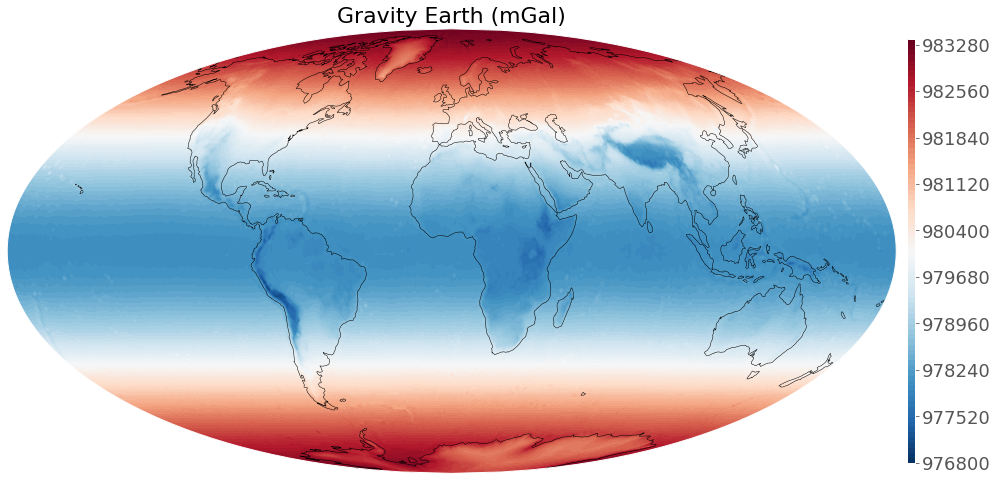

In [11]:
title_font = 22
bottom_font = 18
plt.figure(figsize=(15,15), tight_layout=True)

projection = ccrs.Mollweide()
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.set_title('Gravity Earth (mGal)',size=title_font)
pg = ax.contourf(data_set['LONG'],
            data_set['LAT'],
            data_set['grav_earth'],100,transform=ccrs.PlateCarree(),cmap='RdBu_r')
cb = plt.colorbar(pg, orientation="vertical", pad=0.01, aspect=50, shrink=.4)
cb.ax.tick_params(labelsize=bottom_font)

file_name = 'images/gravity_earth'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')
plt.show()